In [1]:
#Our goal with this implementation is to build a model that accurately predicts whether an individual makes more than $50,000

In [2]:
#https://medium.com/@rahulshuklawork/adult-income-prediction-933be5eb953e
#https://github.com/YashDeshpande1771/Adult-Income-prediction/blob/master/Adult%20income%20classification.ipynb

# Import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pointbiserialr, spearmanr
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.svm import SVC

# Read the data

In [4]:
#fnlwgt: final weight. In other words, this is the number of people the census believes the entry represents..
#education­num: the highest level of education achieved in numerical form.
data=pd.read_csv('income_evaluation.csv')

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data = data.rename(columns={' workclass': 'workclass', ' fnlwgt': 'fnlwgt', ' education': 'education',
                            ' education-num': 'education-num', ' marital-status': 'marital-status', 
                            ' occupation': 'occupation', ' relationship': 'relationship', ' race': 'race', 
                            ' sex': 'sex', ' capital-gain': 'capital-gain', ' capital-loss': 'capital-loss', 
                            ' hours-per-week': 'hours-per-week',' native-country': 'native-country',
                            ' income': 'income'})

# Overview

In [7]:
# overview before cleaning
# axis=0 -> generate for each column
df_before = pd.DataFrame(index=data.columns)
df_before['Datatypes'] = data.dtypes
df_before['Unique'] = data.nunique()
df_before['Max'] = data.max(axis=0)
df_before['Min'] = data.min(axis=0)
df_before['Total'] = data.count(axis=0)
df_before['mean'] = data.mean()
df_before['25 percentile'] = data.quantile(0.25)
df_before['Median'] = data.median()
df_before['75 percentile'] = data.quantile(0.75)
df_before['MissingValues'] = data.isnull().any()
df_before['MissingValuesTotal'] = data.isnull().sum()
df_before

,Datatypes,Unique,Max,Min,Total,mean,25 percentile,Median,75 percentile,MissingValues,MissingValuesTotal
age,int64,73,90,17,32561,38.581647,28.0,37.0,48.0,False,0
workclass,object,9,Without-pay,?,32561,NaN,NaN,NaN,NaN,False,0
fnlwgt,int64,21648,1484705,12285,32561,189778.366512,117827.0,178356.0,237051.0,False,0
education,object,16,Some-college,10th,32561,NaN,NaN,NaN,NaN,False,0
education-num,int64,16,16,1,32561,10.080679,9.0,10.0,12.0,False,0
marital-status,object,7,Widowed,Divorced,32561,NaN,NaN,NaN,NaN,False,0
occupation,object,15,Transport-moving,?,32561,NaN,NaN,NaN,NaN,False,0
relationship,object,6,Wife,Husband,32561,NaN,NaN,NaN,NaN,False,0
race,object,5,White,Amer-Indian-Eskimo,32561,NaN,NaN,NaN,NaN,False,0
sex,object,2,Male,Female,32561,NaN,NaN,NaN,NaN,False,0


# Check the distribution of the variables (histogram)

This column workclass can not be represented as a histogram
This column education can not be represented as a histogram
This column marital-status can not be represented as a histogram
This column occupation can not be represented as a histogram
This column relationship can not be represented as a histogram
This column race can not be represented as a histogram
This column sex can not be represented as a histogram
This column native-country can not be represented as a histogram
This column income can not be represented as a histogram


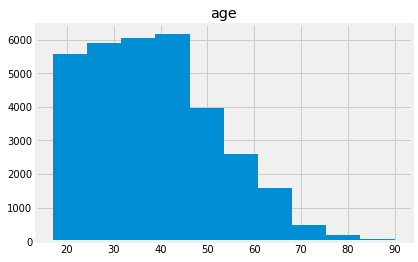

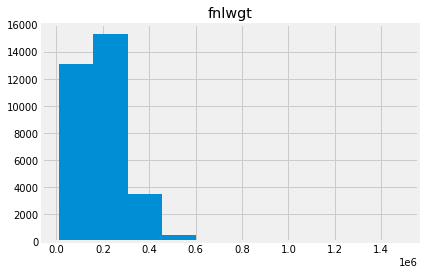

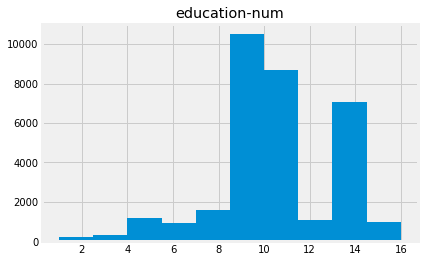

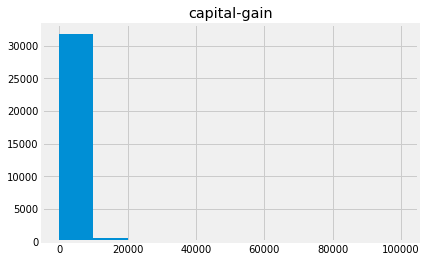

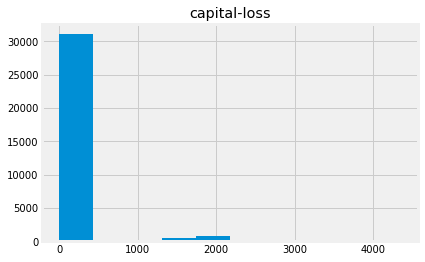

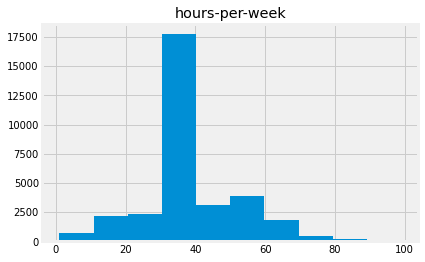

In [8]:
for col in data.columns: 
    try:      
        data[col] = pd.to_numeric(data[col]) 
        data.hist(column=col)
    except ValueError:
        print('This column '+col+' can not be represented as a histogram')

# Build pairplots between different features

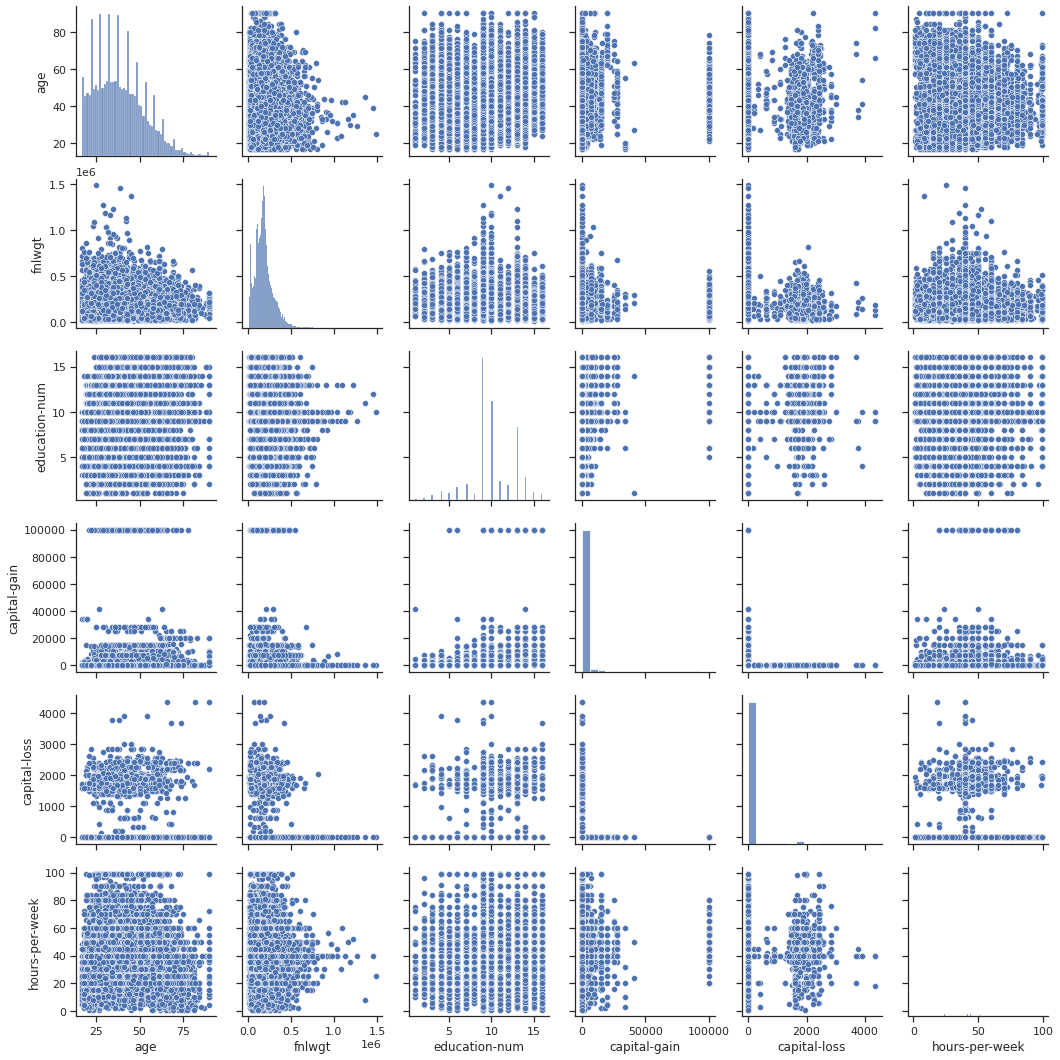

In [9]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
iris = data
g = sns.pairplot(iris)


import matplotlib.pyplot as plt
plt.show()

# Check how many true cases vs. each categorical features

In [10]:
data.loc[data['workclass'] == ' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [11]:
import numpy as np

data = data.replace(' ?', np.nan).dropna()
data = data.replace('?', np.nan).dropna()
data = data.drop(['fnlwgt'], axis =1)

# Categorial to number

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
temp= data
temp["income"] = temp["income"].replace([' <=50K',' >50K' ] , [0,1] )

In [13]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [14]:
data['sex'] = data['sex'].str.strip()
data['race'] = data['race'].str.strip()
data['marital-status'] = data['marital-status'].str.strip()
data['workclass'] = data['workclass'].str.strip()
data['education'] = data['education'].str.strip()
data['occupation'] = data['occupation'].str.strip()
data['relationship'] = data['relationship'].str.strip()
data['native-country'] = data['native-country'].str.strip()

In [15]:
#native-country
data['native-country'] = data['native-country'].map({ 'United-States': 1, 'Cuba': 2, 'Jamaica': 3, 'India': 4, 
 'Mexico': 5,'Puerto-Rico': 6, 'Honduras': 7,'England': 8,'Canada': 9,'Germany': 10, 'Iran': 11, 'Philippines': 12, 
'Poland': 13,'Columbia':14,'Cambodia':15,'Thailand':16,'Ecuador':17,'Laos':18,'Taiwan':19,'Haiti':20,
'Portugal':21,'Dominican-Republic':22,'El-Salvador':23,'France':24,'Guatemala':25,'Italy':26,'China':27,
'South':28,'Japan':29,'Yugoslavia':30,'Peru':31,'Outlying-US(Guam-USVI-etc)':32,'Scotland':33,'Trinadad&Tobago':34,
'Greece':35,'Nicaragua':36,'Vietnam':37,'Hong':38,'Ireland':39,'Scotland':40,'Hungary':41,'Holand-Netherlands':42}).astype(int)
#sex
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1}).astype(int)
#race
data['race'] = data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital-status
data['marital-status'] = data['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
#workclass
data['workclass'] = data['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
#education
data['education'] = data['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
#occupation
data['occupation'] = data['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
#relationship
data['relationship'] = data['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

# Scale the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = data.columns
min_max = pd.DataFrame(data = data)
min_max[numerical] = scaler.fit_transform(data[numerical])
display(min_max.head())
data_scaled = min_max

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.166667,0.800000,0.800000,0.833333,0.153846,0.0,0.75,0.0,0.02174,0.0,0.397959,0.00000,0.0
1,0.452055,1.000000,0.800000,0.800000,0.333333,0.461538,0.8,0.75,0.0,0.00000,0.0,0.122449,0.00000,0.0
2,0.287671,0.833333,0.200000,0.533333,0.666667,0.230769,0.0,0.75,0.0,0.00000,0.0,0.397959,0.00000,0.0
3,0.493151,0.833333,0.733333,0.400000,0.333333,0.230769,0.8,0.00,0.0,0.00000,0.0,0.397959,0.00000,0.0
4,0.150685,0.833333,0.800000,0.800000,0.333333,0.307692,0.2,0.00,1.0,0.00000,0.0,0.397959,0.02439,0.0


# Data visualization

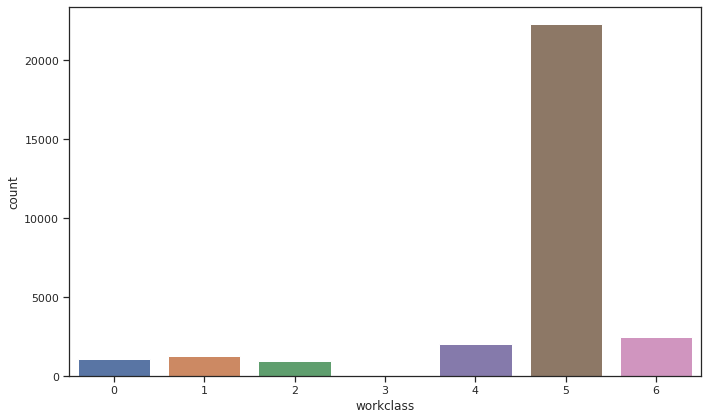

In [17]:
fig = plt.figure(figsize=(10,6))

sns.countplot('workclass', data=data)
plt.tight_layout()
plt.show()

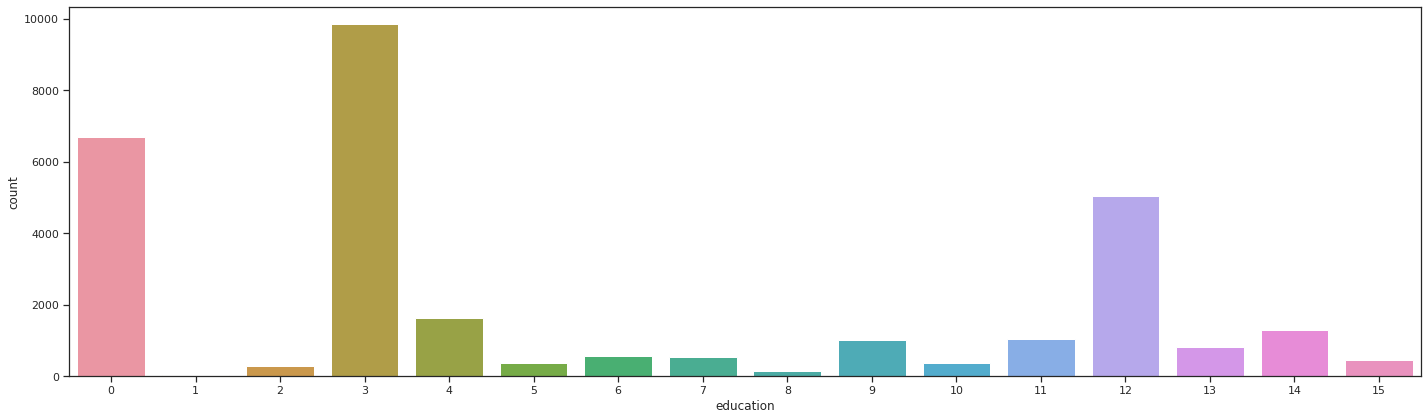

In [18]:
fig = plt.figure(figsize=(20,6))

sns.countplot('education', data=data)
plt.tight_layout()
plt.show()

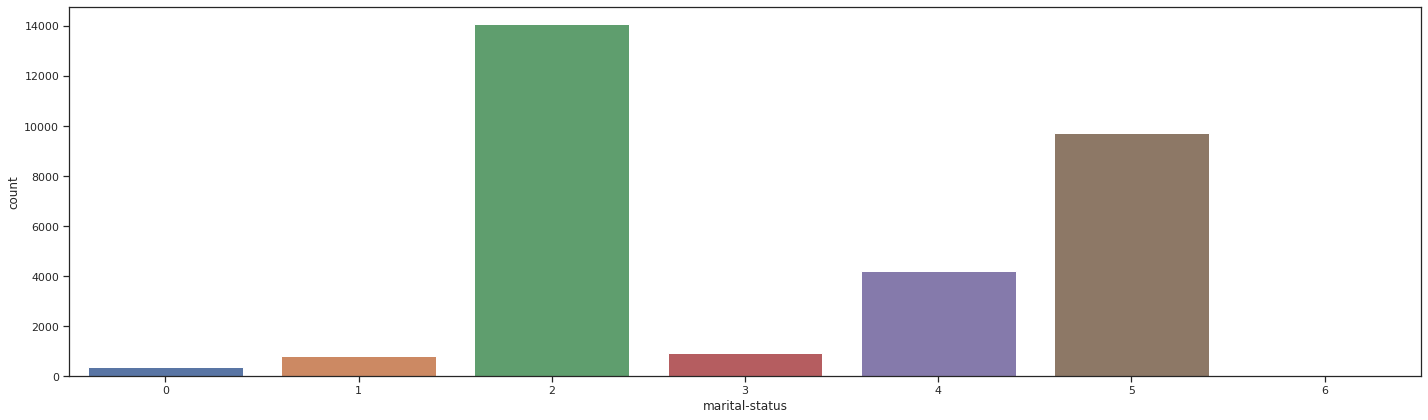

In [19]:
fig = plt.figure(figsize=(20,6))

sns.countplot('marital-status', data=data)
plt.tight_layout()
plt.show()

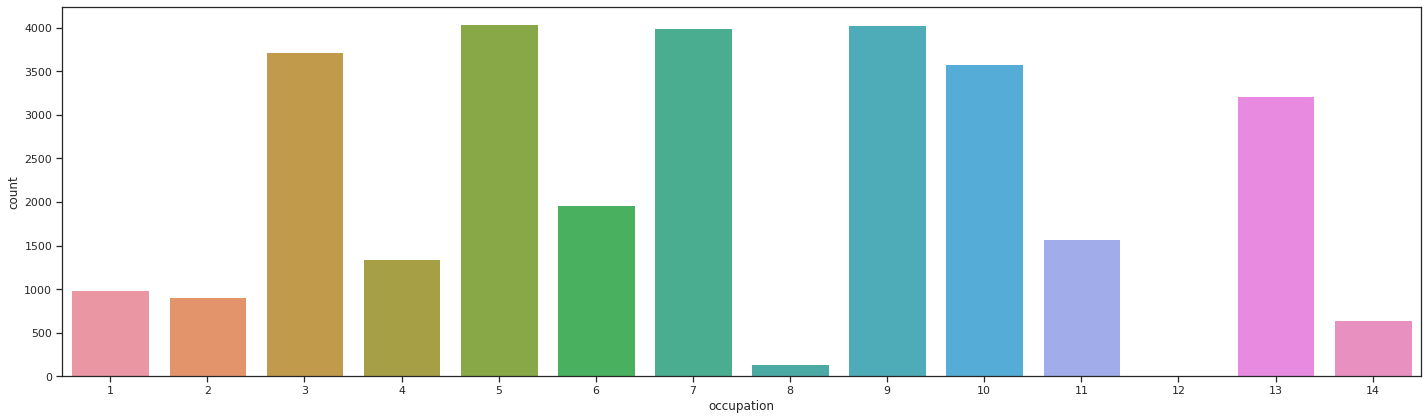

In [20]:
fig = plt.figure(figsize=(20,6))

sns.countplot('occupation', data=data)
plt.tight_layout()
plt.show()

# Check the correlation between features

In [ ]:
hmap = data.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

# Splitting the Data


In [27]:
data = data[['income', 'education-num', 'relationship', 'race', 'hours-per-week','age']]

In [28]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['income'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['income']

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_scaled_X = sc.fit_transform(train_X)
test_scaled_X = sc.transform(test_X)

# SVM

In [25]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_scaled_X, train_Y)
prediction1 = svclassifier.predict(test_scaled_X)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for linear SVM is  0.7985412752790364


In [26]:
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(train_scaled_X, train_Y)
prediction2 = svclassifier.predict(test_scaled_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction2,test_Y))

KeyboardInterrupt: 

#  Naïve baies

In [ ]:
model=GaussianNB()
model.fit(train_scaled_X,train_Y)
prediction3=model.predict(test_scaled_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction3,test_Y))

# Logistic regression

In [ ]:
model = LogisticRegression()
model.fit(train_scaled_X,train_Y)
prediction4=model.predict(test_scaled_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction4,test_Y))

#  Decision tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_scaled_X,train_Y)
prediction5=model.predict(test_scaled_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction5,test_Y))

# Random Forest

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_scaled_X,train_Y)
prediction6=model.predict(test_scaled_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction6,test_Y))

# XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(train_scaled_X,train_Y)
prediction7 = model.predict(test_scaled_X)
print('The accuracy of the XGBClassifier is ', metrics.accuracy_score(prediction7,test_Y))

# Cross Validation

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=3, shuffle=False,random_state=None) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Rbf Svm','Naive Bayes','Logistic Regression','Decision Tree','Random Forest','XGBoost']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2